# Modern portfolio theory with Monte Carlo simulations

The modern portfolio theory is an investment theory practised and used by many fund managers. The modern portfolio primarily tries to reduce risk and increase return through stock diversification.

Although, the returns of a given portfolio is the returns of all the stock weighted averages. This is not the case for when it comes to risk. 

When measuring risk of a portfolio, we have to take into account not only the individual risk of stocks but the correlation they have with each other as they move through time. As a result, choosing stocks that are not highly correlated is one way of reducing risk in portfolio.

Once we have selected the stocks in  a given portfolio, the modern portfolio theory dictates that we can further reduce the risk through optimising the stock weight allocation. In this case, it is certainly possible to construct a portfolio which has lower risk than the stock with the lowest risk (in the given portfolio). 

The Monte Carlo simulation is used to simulate the returns across the next 250 trading days to see what kind of returns our optimal portfolio will yield in comparisson to a one stock strategy.



In [937]:
import quandl
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


- The selected stocks for the notebook are Lockheed Martin (LMT), Aurora Cannabis (ACB) , Tesla (TSLA) and JP Morgan (JPM).

In [997]:
prices=web.DataReader(['LMT','ACB','TSLA','JPM'], 'yahoo',start='2013/01/01', end='2020/01/01')['Adj Close']
prices=prices.dropna()
prices

Symbols,LMT,ACB,TSLA,JPM
Date,,,,
2014-07-15,137.228897,7.212000,219.580002,49.128345
2014-07-16,136.325943,7.668000,217.160004,49.499310
2014-07-17,136.140289,7.668000,215.399994,48.782661
2014-07-18,137.119171,7.668000,220.020004,49.094635
2014-07-21,137.532669,7.104000,220.539993,49.103062
...,...,...,...,...
2019-12-24,385.399719,23.880009,425.250000,133.990799
2019-12-26,387.503693,24.000010,430.940002,135.412704
2019-12-27,388.787781,22.920010,430.380005,135.510101


- In the following section we will compute the correlation matrix to see the stocks daily return over time. We can see that the following stocks have very little correlation which is desired in modern portfolio theory.

In [998]:
#Correlation matrix

#Normalise the data first
corr_matrix=prices.pct_change().corr()
corr_matrix

Symbols,LMT,ACB,TSLA,JPM
Symbols,,,,
LMT,1.000000,0.039434,0.137400,0.388490
ACB,0.039434,1.000000,0.072414,0.085487
TSLA,0.137400,0.072414,1.000000,0.243365
JPM,0.388490,0.085487,0.243365,1.000000


In [999]:
# Covarince matrix

#“Covariance” indicates the direction of the linear relationship 
#between variables.

#Normalise the data first
cov_matrix=prices.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,LMT,ACB,TSLA,JPM
Symbols,,,,
LMT,0.000121,0.000026,0.000043,0.000056
ACB,0.000026,0.003290,0.000116,0.000063
TSLA,0.000043,0.000116,0.000784,0.000090
JPM,0.000056,0.000063,0.000090,0.000170




- Compute the end of year returns of each stock and the standard deviation which is the volatility (risk).

In [1000]:
e_r=prices.resample('Y').last().pct_change()
e_r

Symbols,LMT,ACB,TSLA,JPM
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-12-31,0.161846,-0.539560,0.079133,0.083725
2016-12-31,0.183716,3.105012,-0.109662,0.345364
2017-12-31,0.317660,3.436047,0.457017,0.274888
2018-12-31,-0.163459,-0.349934,0.068893,-0.066238
2019-12-31,0.525466,-0.564516,0.257001,0.472570


In [1001]:
#calculate the average expected yearly return
e_mean_r=prices.resample('Y').last().pct_change().mean()
e_mean_r


Symbols
LMT     0.205046
ACB     1.017410
TSLA    0.150477
JPM     0.222062
dtype: float64

In [1002]:
#standard deviation
sd=e_r.std()
sd


Symbols
LMT     0.251728
ACB     2.061805
TSLA    0.214903
JPM     0.213894
dtype: float64

- Join the yearly mean returns and yearly volatility for ease of reading

In [1003]:
#Concatenate the two dataframes together
stock_performance=pd.concat([e_mean_r,sd],axis=1)
stock_performance.columns=(['Returns','Volatility'])
stock_performance

,Returns,Volatility
Symbols,,
LMT,0.205046,0.251728
ACB,1.017410,2.061805
TSLA,0.150477,0.214903
JPM,0.222062,0.213894


In [1004]:
stock_performance['Returns'][0]

0.20504588539549723

## Generating random stock weighted portfolios

In this section we will generate 1000 random stock weight allocation to get an insight to the risk and return attributed with the portfolios. The goal is to find relationships between the portfolios and see if we can draw information derive to an optimal portfolio.

In [1005]:
#create empty lists
p_ret=[]
p_vol=[]
p_weights=[]

num_assets=len(prices.columns)

#number of portfolios to generate
num_portfolios=1000




In [1006]:
#generate random weight allocations and append
#their returns and volatility to the empty lists

for portfolio in range(num_portfolios):
    #take 4 random numbers
    weights=np.random.random(num_assets)
    #turn numbers into fractions that add up to 1
    weights= weights/np.sum(weights)
    #add the random portfolio weights to list p_weights
    p_weights.append(weights)
    #multiply the portfolio weights by the expected return of each stock
    returns=np.dot(weights,e_mean_r)
    #append the results to p_ret
    p_ret.append(returns)
    
    #calculate the variance and standard deviation of constructed port.
    var=cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd=np.sqrt(var)
    ann_sd=sd*np.sqrt(250)
    #append the portfolio volatility to p_vol list
    p_vol.append(ann_sd)

weights

array([0.28158502, 0.2206099 , 0.20110069, 0.29670439])

In [1007]:
#return the all of the 1000 portfolio returns and volatility calculated for the different
data={'Returns':p_ret, 'Volatility':p_vol}

- In the following part we cobine all of the 1000 portfolios in one dataframe for ease of reading and analysis. 
 

In [1008]:
#combine everything together
for counter,symbol in enumerate(prices.columns.tolist()):
    data[symbol+ ' weight']=[w[counter] for w in p_weights]

In [1009]:
#Turn it into a dataframe
portfolios=pd.DataFrame(data)
portfolios.sort_values(by=['Volatility'], inplace=True)
portfolios.to_csv('efficient frontier VI.csv')
portfolios.head()

,Returns,Volatility,LMT weight,ACB weight,TSLA weight,JPM weight
462,0.226515,0.154751,0.660609,0.024903,0.057441,0.257047
628,0.232218,0.155229,0.662807,0.028502,0.017252,0.291439
591,0.230105,0.155518,0.520397,0.024409,0.035149,0.420045
180,0.234708,0.156076,0.558667,0.035460,0.084514,0.321359
770,0.214958,0.156360,0.540982,0.003823,0.013114,0.442082


- Plot the results in order to visually see how the portfolios behave in terms of volatility and returns.

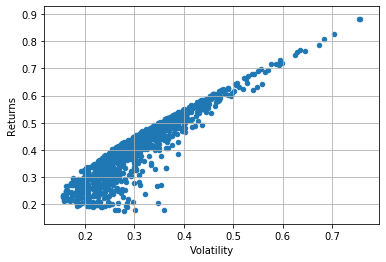

In [1010]:
#plot grapgh
portfolios_plot=portfolios.plot.scatter(x='Volatility',y='Returns', grid=True)
portfolios_plot

By looking at the general trend we can see that there is a linear relationship between volatility and returns. 

In modern portfolio theory it is desired to choose portfolios that reside on the 'efficient frontier' as they yield the maximum return per set volatility . Any portfolio below the efficient frontier is deemed to be inefficient.


##### Global minimum variance and max Sharpe ratio porfolios 

- In modern portfolio theory, the global minimum variance is the portfolio that exhibits the lowest volatility from all simulated portfolios.


- The sharpe ratio metric gives insight to how much returns we get per unit of volatility (the return you get per unit of risk). This is calculated by dividing the returns by standard deviation. The portfolio with the highest sharpe ratio is the most desirable as it has the most sensible risk-adjusted returns.




In [1011]:
#extract the global minumum varinace portfolio
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,LMT weight,ACB weight,TSLA weight,JPM weight
462,0.226515,0.154751,0.660609,0.024903,0.057441,0.257047


In [1012]:

#all we are doing is refering to min volatility reading using loc function

#global minumum variance portfolio info
min_var_port=portfolios.loc[portfolios['Volatility'].idxmin()]
min_var_port

Returns        0.226515
Volatility     0.154751
LMT weight     0.660609
ACB weight     0.024903
TSLA weight    0.057441
JPM weight     0.257047
Name: 462, dtype: float64

#### Most efficient portfolio


In the following section we will find the portfolio which has the maximum sharpe ratio.

In [1013]:
#calculate the sharpe ratio and find the corresponding portfolio index
sharpe_port=pd.DataFrame()
sharpe_port=portfolios['Returns']/portfolios['Volatility']
max_sharpe=sharpe_port.loc[sharpe_port.idxmax()]

print('Portfolio index :'+str(sharpe_port.idxmax()))
print('Max sharpe ratio:'+str(max_sharpe))

Portfolio index :550
Max sharpe ratio:1.6927323986427696


In [1014]:
#max sharpe ratio portfolio info
max_sharpe_port=portfolios.loc[sharpe_port.idxmax()]
max_sharpe_port

Returns        0.297549
Volatility     0.175781
LMT weight     0.523068
ACB weight     0.108506
TSLA weight    0.026712
JPM weight     0.341714
Name: 550, dtype: float64

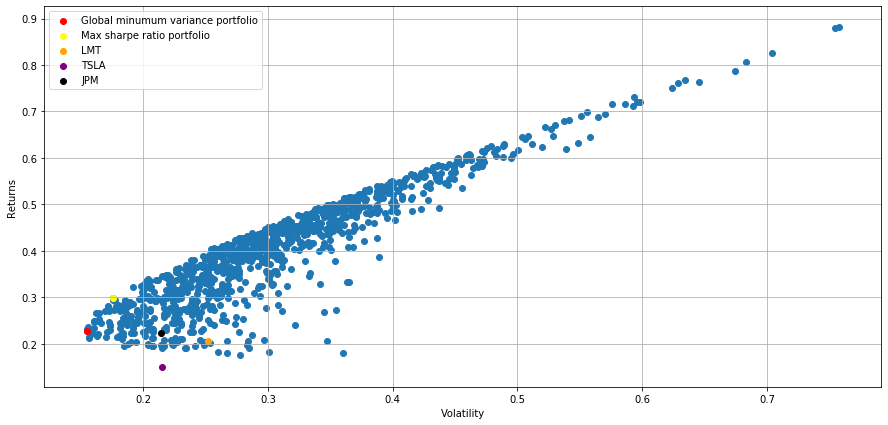

In [1016]:
#Plot the min volatillity in conjunction with the other portfolios
plt.subplots(figsize=(15,7))
plt.scatter(portfolios['Volatility'],portfolios['Returns'])
plt.grid()

plt.xlabel('Volatility')
plt.ylabel('Returns')
#
plt.scatter(min_var_port[1],min_var_port[0], color='red', label='Global minumum variance portfolio')#Global minumum variance portfolio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0], color='yellow',label='Max sharpe ratio portfolio')#Max sharpe ratio

#individual stock returns
plt.scatter(stock_performance['Volatility'][0],stock_performance['Returns'][0], color='orange', label='LMT')#LMT
# plt.scatter(stock_performance['Volatility'][1],stock_performance['Returns'][1], color='green', label='ACB')#ACB
plt.scatter(stock_performance['Volatility'][2],stock_performance['Returns'][2], color='purple', label='TSLA')#TSLA
plt.scatter(stock_performance['Volatility'][3],stock_performance['Returns'][3], color='black', label='JPM')

plt.legend()

### Summary

- We have identified the individual stock returns, volatility and correlation metrics

- We have constructed 1000 randomly weighted stock portfolios

- We identified the efficient frontier of the randomly generated portfolios

- We have identified the portfolio with the least volatility (red dot) and with the maximum sharpe ratio (yellow dot). We have also located where the individual stocks are situated in regards to the efficient frontier.


# Monte carlo simulation for expected returns of the efficient portfolio 

Now that we have found the optimal stock weighting of our portfolio, we can construct a Monte Carlo simulation to evaluate the expected return over the next year.





In [1100]:
#optimal portfolio weightings
# LMT weight     0.523068
# ACB weight     0.108506
# TSLA weight    0.026712
# JPM weight     0.341714

###### Computing the expected returns for efficient portfolio

In [1017]:
#get the stock data
portfolio_data=web.DataReader(['LMT','ACB','TSLA','JPM'], 'yahoo',start='2013/01/01', end='2020/01/01')['Adj Close']


#build the portfolio returns from starting date
portfolio_data['efficient_portfolio']= (( 0.523068*portfolio_data['LMT']) +(0.026712*portfolio_data['TSLA'])+(0.108506*portfolio_data['ACB'])+(0.341714*portfolio_data['JPM']))

portfolio_data=portfolio_data.dropna()
portfolio_data

Symbols,LMT,ACB,TSLA,JPM,efficient_portfolio
Date,,,,,
2014-07-15,137.228897,7.212000,219.580002,49.128345,95.215854
2014-07-16,136.325943,7.668000,217.160004,49.499310,94.855147
2014-07-17,136.140289,7.668000,215.399994,48.782661,94.466136
2014-07-18,137.119171,7.668000,220.020004,49.094635,95.208173
2014-07-21,137.532669,7.104000,220.539993,49.103062,95.380033
...,...,...,...,...,...
2019-12-24,385.399719,23.880009,425.250000,133.990799,261.327194
2019-12-26,387.503693,24.000010,430.940002,135.412704,263.078613
2019-12-27,388.787781,22.920010,430.380005,135.510101,263.651415


###### Annual expected returns and standard deviations

In [1077]:
#anualised standard deviation
def std(price):
    ann=np.sqrt(252)*price.std()
    
    return ann

In [1078]:
#yearly mean returns
e_r=round(portfolio_data.resample('Y').last().pct_change().mean(),1)
e_r


Symbols
LMT                    0.2
ACB                    1.0
TSLA                   0.2
JPM                    0.2
efficient_portfolio    0.2
dtype: float64

In [1079]:
print('Annual {} volatility:'.format('LMT'),std(portfolio_data['LMT'].pct_change()))
print('Annual {} volatility:'.format('ACB'),std(portfolio_data['ACB'].pct_change()))

print('Annual {} volatility:'.format('TSLA'),std(portfolio_data['TSLA'].pct_change()))
print('Annual {} volatility:'.format('JPM'),std(portfolio_data['JPM'].pct_change()))
print('Annual {} volatility:'.format('Efficient portfolio'),std(portfolio_data['efficient_portfolio'].pct_change()))

Annual LMT volatility: 0.17483393372207426
Annual ACB volatility: 0.904432228810852
Annual TSLA volatility: 0.44544570924047533
Annual JPM volatility: 0.20726262936771414
Annual Efficient portfolio volatility: 0.1584158993102066


The yearly mean returns of the efficient portfolio are roughly the same as some stocks in portfolio such as LMT. However, we can see that the volatility (standard deviation) of the efficient portfolio is the lowest to its counterparts as expected. 

###### Simulations

In [1080]:
#normalize the data for ease of handling
log_returns=np.log(1+portfolio_data['efficient_portfolio'].pct_change())
log_returns=log_returns.dropna()
log_returns

Date
2014-07-16   -0.003796
2014-07-17   -0.004110
2014-07-18    0.007824
2014-07-21    0.001803
2014-07-22    0.023384
                ...   
2019-12-24   -0.002417
2019-12-26    0.006680
2019-12-27    0.002175
2019-12-30   -0.005579
2019-12-31   -0.002380
Name: efficient_portfolio, Length: 1376, dtype: float64

In [1081]:
#log return fixed mean
mean=log_returns.mean()
#log varinace of the returns
var= log_returns.var()

- The stock drift can be calculated using the mean and variance. This will help us when generating the Monte Carlo simulation 

In [1082]:
#drift
portfolio_drift= mean-(0.5*var)
#standard deviation of the log returns
portfolio_stdev=log_returns.std()


- For this example we will make 10,000 simulations across the next 250 trading days

In [1029]:
#rows
t_intervals=250
simulations=10000


The following section will generate 10,000 random simulation using the standard deviation and drift values calculated.

- Using the norm.ppf we can construct an array of random values in the shape of 250x10000. As outlined before, 250 corresponds to the trading days available in a year and 10,000 to the number of simulation we will carry out.

- We will use the numpy function random.rand to generate random values and pass the drift and standard deviation as instruction guideline to create the daily returns array.

In [1056]:
#contructing the simulated daily returns
daily_returns=np.exp(portfolio_drift+portfolio_stdev*norm.ppf(np.random.rand(t_intervals,simulations)))

In [1058]:
daily_returns.shape

(250, 10000)

- Plot the randomly generated simulations using the drift and stdev

 ...]

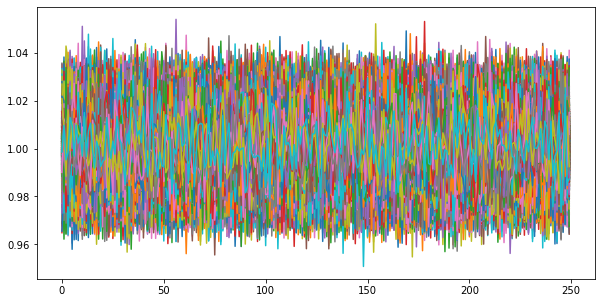

In [1059]:
plt.subplots(figsize=(10,5))
plt.plot(daily_returns)

- Now we will create an array of zeros in the same dimension as before (250x10,000) and fill the first row with the stocks last data. This is so that all our 10,000 simulation start from the same value, which is last portfolio index reading.

In [1060]:
#zero array in dimention (250x10000)
price_list=np.zeros_like(daily_returns)
price_list[0]=last_value

- The following for loop will iterate through each of the 250 trading days whilst adding 10,000 random daily returns row by row. 

- As we want the simulation to resemble a time series format we have made sure to order the random values sequentially. We also have started all the simulations from last value portfolio index



In [1061]:
#change the zero values with actual simulated LMT price data 
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]* daily_returns[t]

In [1062]:
#quick check of the dataframe
simulation_df=pd.DataFrame(price_list)
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,...,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222,261.561222
1,264.876227,268.924112,260.001117,261.847701,260.999771,258.806464,262.104875,259.004062,263.503703,261.715307,...,259.084567,261.193769,256.785247,261.504266,261.211149,262.672276,264.785106,264.455894,263.806741,264.082173
2,264.055754,268.026844,263.206442,261.140929,260.539693,256.874836,263.876583,263.190574,262.766010,258.270667,...,258.262234,257.442261,258.214472,263.155624,257.804914,265.401746,262.051948,264.041063,260.749632,262.837608
3,269.426180,272.656655,263.539020,264.683312,263.432881,255.296776,266.234663,262.487117,260.579085,256.048473,...,256.236326,259.617025,259.220092,263.566909,262.491796,261.638108,258.718275,258.985871,264.975941,262.448572
4,269.323031,278.971533,266.088916,267.141368,262.800322,259.007198,266.925756,261.575911,260.441545,253.772506,...,257.496748,260.609540,259.857238,263.553910,263.468701,260.996255,257.528813,260.372408,264.760915,265.829586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,261.169203,367.636812,312.582099,329.811125,275.231682,402.740817,375.750038,343.704443,267.710700,346.721354,...,238.536405,348.695084,375.983618,372.902992,330.319835,268.125157,365.341292,242.282368,462.924504,385.521030
246,256.680755,366.806776,310.501806,332.145882,277.224454,408.816490,373.249714,342.537047,268.664325,350.847290,...,237.384651,349.481986,376.011756,374.506601,332.521734,269.283851,366.127137,237.044897,457.009710,380.774415
247,256.579979,370.876705,309.937286,341.180702,275.783939,409.593094,367.967345,347.948994,269.409054,352.585505,...,240.537830,345.407691,374.224199,378.354284,333.789578,274.767420,370.747260,236.731315,458.595581,389.368849
248,259.748881,367.117728,307.061017,342.643512,277.500426,410.569181,370.280724,351.998255,272.094087,351.349282,...,237.570904,346.777136,381.728460,376.282002,334.196276,279.173720,367.841899,234.124186,464.814771,383.749529


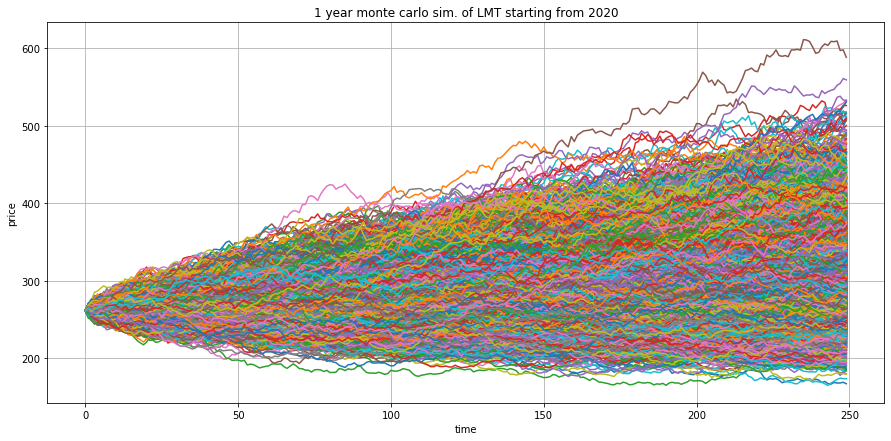

In [1064]:
#Quick plot
plt.figure(figsize=(15,7))
plt.title('1 year monte carlo sim. of LMT starting from 2020')
plt.ylabel('price')
plt.xlabel('time')

plt.grid()

plt.plot(price_list)
plt.show()

- We can see the constructed Monte Carlo simulation does fairly good at simulating the possible paths for the next 250 days given the constrain parameters( dirft and standard deviation). 


In the following section we will fetch the last reading of all the 10,000 simulations generated and analyse the information.

In [1083]:
#get the last reading for all the 10000 simulation 
last_sim_values=simulation_df.iloc[249]
last_sim_values

0       260.278042
1       366.926183
2       301.860041
3       340.952997
4       276.825266
           ...    
9995    278.918305
9996    373.393448
9997    232.611552
9998    461.317916
9999    378.897742
Name: 249, Length: 10000, dtype: float64

- Plot the end results (250th day) of all the simulated outcomes in a histogram to see the distribution amongst them

(array([  2.,   3.,  11.,  19.,  32.,  66.,  95., 165., 265., 316., 381.,
        477., 573., 619., 694., 680., 680., 610., 653., 593., 517., 498.,
        379., 345., 285., 232., 165., 153., 115.,  92.,  67.,  55.,  46.,
         35.,  18.,  21.,  10.,   4.,  10.,   1.,   8.,   3.,   1.,   4.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([167.42246   , 175.83354306, 184.24462612, 192.65570918,
        201.06679224, 209.4778753 , 217.88895836, 226.30004142,
        234.71112448, 243.12220754, 251.53329059, 259.94437365,
        268.35545671, 276.76653977, 285.17762283, 293.58870589,
        301.99978895, 310.41087201, 318.82195507, 327.23303813,
        335.64412119, 344.05520425, 352.46628731, 360.87737036,
        369.28845342, 377.69953648, 386.11061954, 394.5217026 ,
        402.93278566, 411.34386872, 419.75495178, 428.16603484,
        436.5771179 , 444.98820096, 453.39928402, 461.81036707,
        470.22145013, 478.63253319, 487.04361625, 495.45469931,
        503.865782

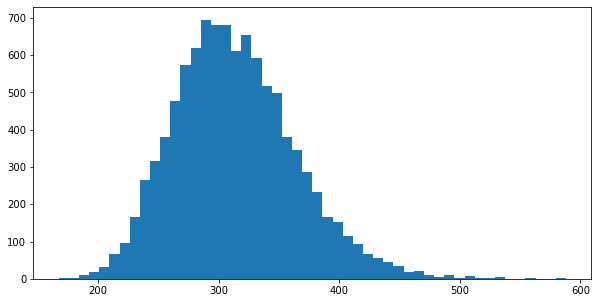

In [1101]:
#quick histogram plot
plt.figure(figsize=(10,5))
plt.hist(last_sim_values, bins=50)

In [1088]:
#stats on the 10,000 simulation
last_sim_values.describe()

count    10000.000000
mean       313.597899
std         50.253398
min        167.422460
25%        278.150138
50%        309.433391
75%        344.872492
max        587.976613
Name: 249, dtype: float64

In [1086]:
#fetch the last stock data reading as we will start our simulation form there
last_value=portfolio_data['efficient_portfolio'].iloc[-1]
last_value

261.561221746666

In [1097]:
portfolio_increase_after_250_days=round(100*((last_sim_values.describe()[1]/last_value)-1),2)
print('Simulated mean portfolio return:'+ str(portfolio_increase_after_250_days)+str('%'))

Simulated mean portfolio return:19.89%


##### Efficient portfolio summary


- Using the Monte Carlo simulation the investor can expect to get 313 dollars (mean portfolio) after 250 days of trading.

- This amounts to ~20% increase since initial price.

In order to get further detailed information we will look into the confidence intervals of the simulations.

In [1098]:


probability_of_hitting_target=len(last_sim_values[last_sim_values<last_value])/len(last_sim_values) 
print(round(100-probability_of_hitting_target*100,2),'% of portfolio simulated yielded above 20% return')

85.58 % of portfolio simulated yielded above 20% return


In [1071]:


probability_of_hitting_target=len(last_sim_values[last_sim_values<twenty_percent_return])/len(last_sim_values)   #70% are less than 500 which means 30% of more than 500
print(round(100-probability_of_hitting_target*100,2),'% of portfolio simulation yielded above 20% return')

46.79 % of portfolio simulation yielded above 20% return


- Using the simulated results we can see that after 250 days of trading, nearly 85% of all simulated expected returns were above the starting stock price

- Around 45% of all simulated expected returns are above 461 which is 20% above the starting stock price.



In [1099]:
# percent tiles
p_tiles= np.percentile(last_sim_values,[5,10,15,50,25,75,85,90,95])
print(p_tiles)



[238.90642135 252.09383194 262.45289293 309.43339068 278.15013768
 344.87249173 364.78708284 378.80289548 402.07055924]


By constructing the percentile intervals we can see that there is 95% chance that the efficient portfolio will not go below 238 dollars(9% loss from initial price) by the end of the year.

The Monte Carlo simulations suggest that there is less than 5% chance that the efficient portfolio index will go above 402 dollars (+54% for the year).

It is good practice to use the confidence intervals readings as a guide to help make better risk adjusted trades.


## Conclusion

Even though, the return associated with the uncorrelated individual stocks is roughly the same, by grouping them together we were able to reduce the overall risk significantly.

Through diversification and weight allocation optimisation the investor can expect to get more returns per unit of risk taken, in comparison to investing in only one stock strategy.


The Monte Carlo simulation of the efficient portfolio gave insight on the expected returns over the next year given the constrain parameters. This is carried out mainly to model and asses the portfolio risk overtime. Using the confidence intervals computed from the simulations, the investors can make a decision based on the risk they are willing to take to get the desired outcome they need.


 